In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
dataset = np.load('D:/Modis/Africa/Africa_train_4pixel.npz')
data, labels = dataset['data'], dataset['labels']
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42, stratify=labels)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
X_temp=None
y_temp=None
#data_shape = (4, 4, 4)
num_classes = 8
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)
y_val_categorical = to_categorical(y_val, num_classes=num_classes)

In [2]:
data.shape

(1792609, 4, 4, 4)

In [3]:
X_train.shape

(1254826, 4, 4, 4)

In [4]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, Conv1D, Conv3D, Flatten,Activation,MaxPool2D,MaxPooling2D,Dropout,LSTM
input_shape = X_train.shape[1:]
num_classes = 8
cnn_model = Sequential()
cnn_model.add(Conv2D(32, 2, activation='relu',padding="same", strides=1,input_shape=input_shape))
cnn_model.add(MaxPooling2D(2))
cnn_model.add(Conv2D(64, 2, activation='relu',padding="same", strides=1))
cnn_model.add(MaxPooling2D(2))
cnn_model.add(Conv2D(64, 2, activation='relu',padding="same", strides=1))
cnn_model.add(MaxPooling2D(1))
cnn_model.add(Conv2D(64, 2, activation='relu',padding="same", strides=1))
cnn_model.add(Flatten())
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(24, name='feature_extraction'))
cnn_model.add(Dense(num_classes, activation='softmax'))
cnn_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
cnn_model.summary()

C:\Users\Farah\.conda\envs\deep\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 4, 4, 32)       │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 2, 2, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 64)       │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 1, 1, 64)       │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ feature_extraction (Dense)      │ (None, 24)             │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           200 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,456 (169.75 KB)

 Trainable params: 43,456 (169.75 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('D:/Modis/Africa/CNN_2D_model.keras', monitor='val_loss', save_best_only=True)
history = cnn_model.fit(X_train, y_train_categorical, epochs=100, batch_size=256, validation_data=(X_val, y_val_categorical), callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
4902/4902 ━━━━━━━━━━━━━━━━━━━━ 83s 16ms/step - accuracy: 0.8419 - loss: 0.4464 - val_accuracy: 0.8821 - val_loss: 0.3026
Epoch 2/100
4902/4902 ━━━━━━━━━━━━━━━━━━━━ 78s 15ms/step - accuracy: 0.8813 - loss: 0.3130 - val_accuracy: 0.8869 - val_loss: 0.2924
Epoch 3/100
4902/4902 ━━━━━━━━━━━━━━━━━━━━ 76s 15ms/step - accuracy: 0.8850 - loss: 0.2998 - val_accuracy: 0.8890 - val_loss: 0.2827
Epoch 4/100
4902/4902 ━━━━━━━━━━━━━━━━━━━━ 78s 16ms/step - accuracy: 0.8874 - loss: 0.2906 - val_accuracy: 0.8904 - val_loss: 0.2773
Epoch 5/100
4902/4902 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.8892 - loss: 0.2842 - val_accuracy: 0.8931 - val_loss: 0.2678
Epoch 6/100
4902/4902 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.8919 - loss: 0.2773 - val_accuracy: 0.8944 - val_loss: 0.2681
Epoch 7/100
4902/4902 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.8942 - loss: 0.2715 - val_accuracy: 0.8970 - val_loss: 0.2598
Epoch 8/100
4902/4902 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.89

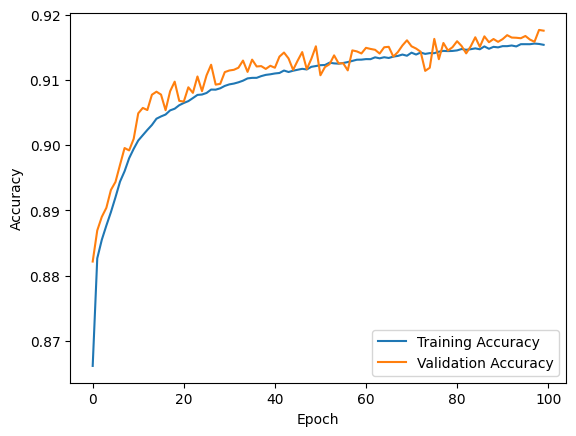

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

8403/8403 ━━━━━━━━━━━━━━━━━━━━ 63s 7ms/step
Accuracy: 0.9176246136910495
Precision: 0.9172205744057176
Recall: 0.9176246136910495
F1-Score: 0.9146911805085488


<Axes: >

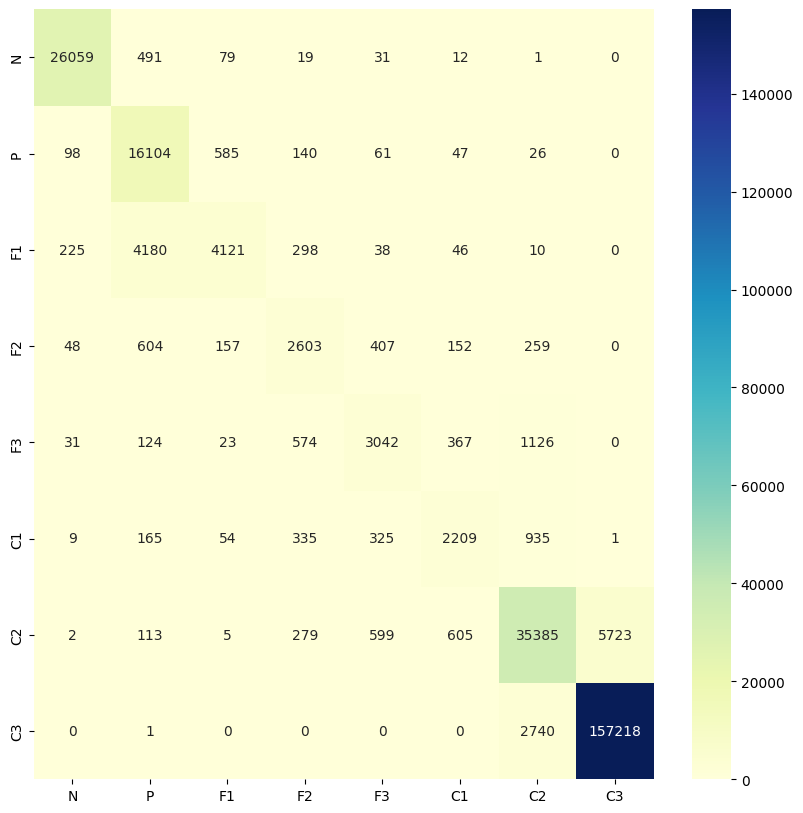

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
import pandas as pd
import seaborn as sn
y_pred_categorical = cnn_model.predict(X_test)
y_pred = np.argmax(y_pred_categorical, axis=1)
y_test = np.argmax(y_test_categorical, axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = ["N","P","F1","F2","F3","C1","C2","C3"], columns = ["N","P","F1","F2","F3","C1","C2","C3"])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt="d",cmap="YlGnBu")

In [8]:
cm

array([[ 26059,    491,     79,     19,     31,     12,      1,      0],
       [    98,  16104,    585,    140,     61,     47,     26,      0],
       [   225,   4180,   4121,    298,     38,     46,     10,      0],
       [    48,    604,    157,   2603,    407,    152,    259,      0],
       [    31,    124,     23,    574,   3042,    367,   1126,      0],
       [     9,    165,     54,    335,    325,   2209,    935,      1],
       [     2,    113,      5,    279,    599,    605,  35385,   5723],
       [     0,      1,      0,      0,      0,      0,   2740, 157218]],
      dtype=int64)